In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt
import sympy as smp

p0 = pd.read_hdf('two_populations.h5', key='P_0_10000')
p1 = pd.read_hdf('two_populations.h5', key='P_1')
p0_1000 = pd.read_hdf('two_populations.h5' ,key='P_0_1000')
# a)
p0_ = p0.to_numpy()
p0x = p0_[:,0]
p0y = p0_[:,1]
p0xm = np.mean(p0x)
p0ym = np.mean(p0y)
mean0 = np.array([p0xm, p0ym])

 
p1_ = p1.to_numpy()
p1x = p1_[:,0]
p1y = p1_[:,1]
p1xm = np.mean(p1x)
p1ym = np.mean(p1y)
mean1 = np.array([p1xm, p1ym])

print(f'The mean vector of population 0 is {mean0}. The mean vector of population 1 is {mean1}.' )


The mean vector of population 0 is [-0.00729968  2.96367644]. The mean vector of population 1 is [6.0962719  3.17467385].


In [2]:
# calculating covariance matrices
v_P0 = np.cov(p0x, p0y)
v_P1 = np.cov(p1x, p1y)

v_P0P1 = v_P0 + v_P1

S_W = v_P0P1
S_B = np.matmul((mean0-mean1).transpose(),(mean0-mean1))

S_W_inv = np.linalg.inv(S_W)

# Eigenvectors

#e_lambda = np.linalg.eig(S_W_inv*S_B)
e_lambda = np.matmul(S_W_inv,(mean0-mean1))

In [3]:
e_lambda

array([-1.24901882,  1.58156321])

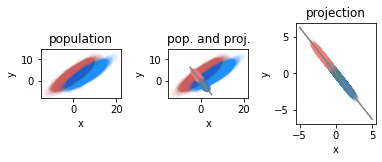

In [4]:
# lambda = (-1.24901882,1.58156321)

# Hilfsebene zur Berechnung des Lotfußpunktes
def H(x,y):
    return -1.24901882*x+1.58156321*y

xx = np.linspace(-5, 5)

# defining projection line function
def lambda_1(x, b=0):
    return -1.58156321/1.24901882*x + b

plot = plt.figure()
plt.subplots_adjust(wspace=0.6)
ax1 = plot.add_subplot(131,aspect='equal',xlabel='x',ylabel='y', title='population')
ax2 = plot.add_subplot(132,aspect='equal',xlabel='x',ylabel='y', title='pop. and proj.')
ax3 = plot.add_subplot(133,aspect='equal',xlabel='x',ylabel='y', title='projection')


# plotting the populations and projection line
ax1.scatter(p0x, p0y, c='indianred', alpha=0.02)
ax1.scatter(p1x, p1y, c='dodgerblue', alpha=0.02)

ax2.scatter(p0x, p0y, c='indianred', alpha=0.02)
ax2.scatter(p1x, p1y, c='dodgerblue', alpha=0.02)
ax2.plot(xx, lambda_1(xx), c='grey')

ax3.plot(xx, lambda_1(xx), c='grey')

# defining constant
c = (1.24901882**2+1.58156321**2)

# calculating the parameters for the foot of a dropped perpendicular
for i in range(len(p0x)):
    r = H(p0x[i],p0y[i])
    s = H(p1x[i],p1y[i])
    
    
    #t, u = smp.symbols('t, u', real = True)
    #t_1 = smp.solve(-1.24901882*(-1.24901882*t)+1.58156321*(1.58156321*t)-r,t)
    #t_2 = smp.solve(-1.24901882*(-1.249018820*u)+1.58156321*(1.58156321*u)-s,u)
    t_1 = r/c
    t_2 = s/c
    
    # plotting the projection
    ax2.scatter(-1.24901882*t_1,1.58156321*t_1, c='lightcoral', alpha=0.1)
    ax2.scatter(-1.24901882*t_2,1.58156321*t_2, c='steelblue', alpha=0.1)
    
    ax3.scatter(-1.24901882*t_1,1.58156321*t_1, c='lightcoral', alpha=0.02)
    ax3.scatter(-1.24901882*t_2,1.58156321*t_2, c='steelblue', alpha=0.02)
    

plt.show()